# Lab 6: Hitters (R)

In the computational section of this Lab you will consider the baseball dataset found in the file hitters.csv. This dataset records the salary of 𝑛 = 263 Major League Baseball players during the 1987 season as well as 𝑞 = 19 statistics associated with the performance of each player during the previous season. Specifically, the dataset contains observations from the following variables:
* AtBat: Number of times at bat in 1986
* Hits: Number of hits in 1986
* HmRun: Number of home runs in 1986
* Runs: Number of runs in 1986
* RBI: Number of runs batted in in 1986
* Walks: Number of walks in 1986
* Years: Number of years in the major leagues
* CAtBat: Number of times at bat during his career
* CHits: Number of hits during his career
* CHmRun: Number of home runs during his career
* CRuns: Number of runs during his career
* CRBI: Number of runs batted in during his career
* CWalks: Number of walks during his career
* League: A categorical variable with levels A (for American) and N (for National) indicating the player’s league at the end of 1986
* Division: A factor with levels E (for East) and W (for West) indicating the player’s division at the end of 1986
* PutOuts: Number of put outs in 1986
* Assists: Number of assists in 1986
* Errors: Number of errors in 1986
* Salary: 1987 annual salary on opening day in thousands of dollars
* NewLeague: A factor with levels A and N indicating the player’s league at the beginning of 1987

In [3]:
library(glmnet, quietly = TRUE)
data <- read.csv("hitters.csv", header = T)

Loaded glmnet 2.0-13



(a) Randomly split the observed data into a training set with 210 observations and a held-out test set containing 53 observations. For purposes of reproducibility,please set the seed to be 1 using the command set.seed(1).

In [4]:
X <- model.matrix(Salary ~ ., data)[,-1]
y <- data$Salary

set.seed(1)
idx <- sample(c(rep(TRUE, 210), rep(FALSE, 53)), size = 263, replace = F)
y.train <- y[idx]
y.test <- y[!idx]
X.train <- X[idx,]
X.test <- X[!idx,]

(b) Fit ridge and LASSO regression models for 1000 values of 𝜆 in the range 0.001 to 10^10 to the training data. For each type of model construct a plot of the parameter estimates versus 𝜆, with each individual parameter represented as a line of a different color on these plots.

[1] "Ridge Regression"


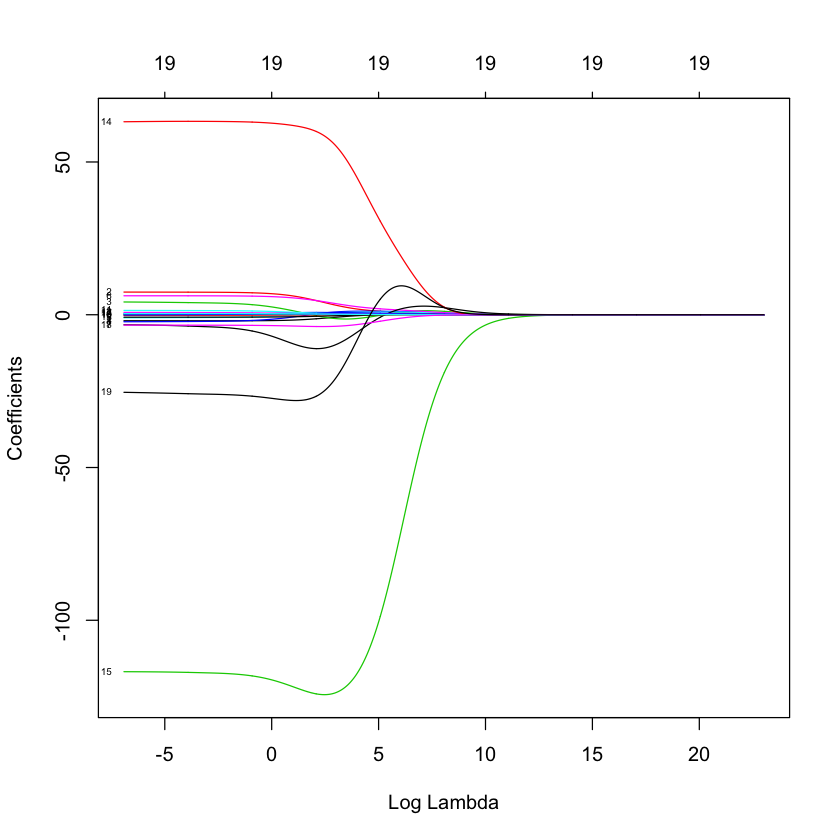

In [7]:
grid <- 10^seq(10, -3, length=1000)

#Ridge Regression
print("Ridge Regression")
ridge.mod <- glmnet(X, y, alpha=0, lambda=grid)
plot(ridge.mod, xvar = "lambda", label = TRUE)

[1] "LASSO Regression"


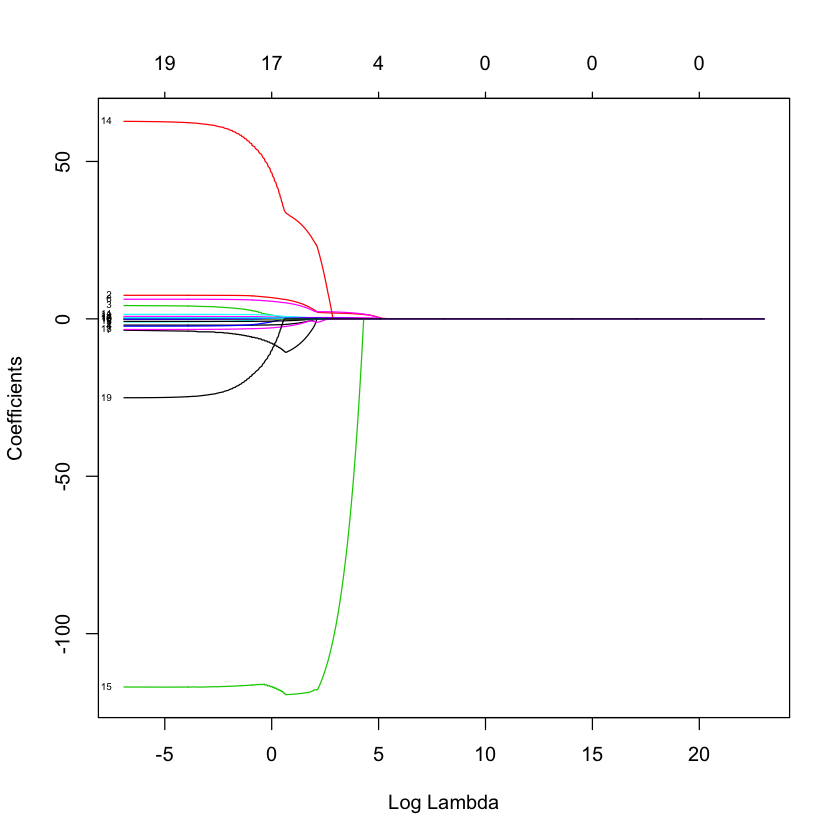

In [8]:
#LASSO Regression
print("LASSO Regression")
lasso.mod <- glmnet(X, y, alpha=1, lambda=grid)
plot(lasso.mod, xvar = "lambda", label = TRUE)

(c) Using 10-fold cross validation on the training data, find the best ridge regression model. That is, find the optimal value of 𝜆 and the 𝛽 estimates that this corresponds to.

In [42]:
cv.out <- cv.glmnet(X.train, y.train, alpha=0)
bestlam.r <- cv.out$lambda.min
print(paste("Optimal value of lamda: ", bestlam.r, sep = ""))
print("Best corresponding ridge regression model:")
predict(ridge.mod, s=bestlam.r, type = "coefficients")[1:20,]

[1] "Optimal value of lamda: 26.2041589648336"
[1] "Best corresponding ridge regression model:"


(Intercept)         AtBat          Hits         HmRun          Runs 
 7.905657e+01 -6.639112e-01  2.731322e+00 -1.370650e+00  1.021599e+00 
          RBI         Walks         Years        CAtBat         CHits 
 7.197450e-01  3.346474e+00 -8.911677e+00 -3.509038e-04  1.345994e-01 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
 6.945618e-01  2.888561e-01  2.543285e-01 -2.722221e-01  5.303443e+01 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
-1.227620e+02  2.633510e-01  1.671150e-01 -3.678850e+00 -1.786659e+01

(d) Using 10-fold cross validation on the training data, find the best LASSO regression model. That is, find the optimal value of 𝜆 and the 𝛽 estimates that this corresponds to.

In [59]:
cv.out <- cv.glmnet(X.train, y.train, alpha=1)
bestlam.l <- cv.out$lambda.min
print(paste("Optimal value of lamda: ", bestlam.l, sep = ""))
print("Best corresponding LASSO regression model:")
predict(lasso.mod, s=bestlam.l, type = "coefficients")[1:20,]

[1] "Optimal value of lamda: 3.01284150783317"
[1] "Best corresponding LASSO regression model:"


(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
 115.2886040   -1.4524375    5.4550263    0.0000000    0.0000000    0.0000000 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
   4.5524670   -9.0120902    0.0000000    0.0000000    0.4813391    0.6300427 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
   0.3910352   -0.4896524   31.6009939 -119.1779252    0.2699943    0.1553273 
      Errors   NewLeagueN 
  -1.9055120    0.0000000

(e) Compare and contrast the models from parts (c) and (d).

The optimal (c) ridge regression and (d) LASSO regression differ in the nuber of explanatory variable they contain. The optimal Ridge regression model contains all 19 explanatory varibales as it should since the varibales will never shrink to zero exactly, but there are some varibales that are shrunken toward zero meaning that they have less influence on the response "Salary" than other varibales. While the optimal LASSO regression model only contains 13 explanatory varibales ("AtBat", "Hits", "Walks", "Years", "CHmRun", "CRuns", "CRBI", "CWalks", "League", "Divsion", "PutOuts", "Assists" and "Errors"). The missing explanatory variables are excluded because they shrunk to zero and are therefore unimportant in prediciting the response "Salary".

(f) Compare the predictive accuracy of the best ridge and LASSO regression models from parts (c) and (d), and the best stepwise selection model from Lab 5 (which included the predictors AtBat, Hits, Walks, CAtBat, CRuns, CRBI, CWalks, DivisionW, PutOuts and Assists). In particular, use these models to predict the observations from the held-out test set and calculate the corresponding root mean squared error (RMSE) in each case. Based on this criterion, which model is the best?

In [61]:
ridge.pred <- predict(ridge.mod, s=bestlam.r, newx=X.test)
ridge.rmse <- sqrt(mean((ridge.pred - y.test)^2))

lasso.pred <- predict(lasso.mod, s=bestlam.l, newx=X.test)
lasso.rmse <- sqrt(mean((lasso.pred - y.test)^2))

train <- data.frame(X.train, Salary = y.train)
test <- data.frame(X.test, Salary = y.test)
step.mod <- lm(Salary ~ AtBat + Hits + Walks + CAtBat + CRBI + CWalks + DivisionW + PutOuts + Assists, data = train)
step.pred <- predict(step.mod, newdata = test)
step.rmse <- sqrt(mean((step.pred - y.test)^2))

print(paste("Predictive RMSE for best Ridge regression model: ", ridge.rmse, sep = ""))
print(paste("Predictive RMSE for best LASSO regression model: ", lasso.rmse, sep = ""))
print(paste("Predictive RMSE for best Stepwise regression model: ", step.rmse, sep = ""))

[1] "Predictive RMSE for best Ridge regression model: 425.655360636108"
[1] "Predictive RMSE for best LASSO regression model: 416.901031623153"
[1] "Predictive RMSE for best Stepwise regression model: 457.489433597482"


The best predicitve accuracy is determined by the lowest predicitive RMSE which in this case is the LASSO regression.